### Noise Visibility Function (NVF)
The Noise Visibility Function (NVF) describes noise visibility in an image. The most known
form of NVF is given as:

${NVF = \frac{1}{1 + \theta \sigma _{x} ^{2} (i, j)}}$
<br>
${\theta = \frac{D}{ \sigma _{x_{max}} ^{2} }}$

- $\sigma_{x_{max}}$ (i, j) denotes the local variance of the image in a window centred on the pixel with
coordinates (i, j), 
- θ plays the role of contrast adjustment for every particular image, ${ \sigma _{x_{max}} ^{2} }$ is
the maximum local variance for a given image 
- D is an experimentally determined parameter.
- The final embedding equation is: 
$y _{i,j} = x _{i,j} + (1 − N V F )z _{i,j}$

### Exercise 5. ex
(a) Read the image lena.png and convert it to grayscale.

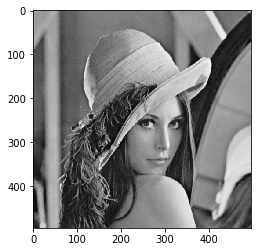

In [54]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2 
import numpy as np
imageLena = mpimg.imread("./data/lena.png")
output = cv2.cvtColor(
    imageLena, 
    cv2.COLOR_RGB2GRAY
    
)
gray__imageLena= output .copy()

plt.imshow(gray__imageLena, cmap = 'gray' )
plt.show()
(h, w) = gray__imageLena.shape[:2] 


### 2.b.1) Add a watermark to the image with and without applying NVF function the different values of ${σ ^z _2}$ (10, 25, 50, 75) and D.  Choose the window size appropriate to used image.

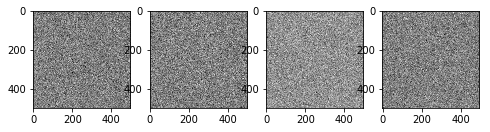

In [55]:
# Here we generate the different watermarks for variances [10, 25, 50, 75]

def generateWatermark(window_size, sigma, mu=0, ):
    (row, col) = window_size
    return np.random.normal(mu,sigma,(row,col))

variances = [10, 25, 50, 75]
watermark_size = gray__imageLena.shape[:2]

watermark_list = [
    generateWatermark(watermark_size, sigma) 
    for sigma in [10, 25, 50, 75]
]
# Add watermark to the image without the NVF function 
#with equation $y = x + z$ which is equivalent to adding gaussian noise 

def addWatermark(img, z):
    return np.add(img, z)

def showImages(images):
    fig=plt.figure(figsize=(8, 8))
    columns = 4
    rows = round(len(images)/columns)
    k=1
    for i in range(1, columns*rows +1):
        fig.add_subplot(rows, columns, i)
        img = images[k-1]
        plt.imshow(img, cmap = 'gray')
        k+= 1
    plt.show()

noNVFwatermarked_Img_list = [
    addWatermark(gray__imageLena, watermark) 
    for watermark in watermark_list
]

showImages(noNVFwatermarked_Img_list)
# get window variance for a 3x3 matrix

# Here we implement the description functions


In [58]:

from scipy import ndimage
lena_variance_matrix = ndimage.generic_filter(gray__imageLena, np.var, size=3)

maxLocalVar = lena_variance_matrix.max()
D = 10
theta = D / maxLocalVar
NVF_matrix =  1/(1+ theta*lena_variance_matrix)


In [59]:
def embeddingEquation(NVF_matrix , x, z):
    return np.add(x, np.multiply((1-NVF_matrix ), z))

NVFwatermarked_Img_list = [
    embeddingEquation(NVF_matrix, gray__imageLena, watermark) 
    for watermark in watermark_list
]

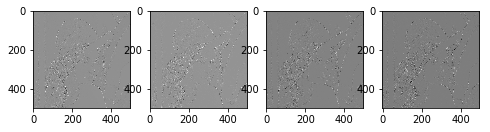

In [60]:
showImages(NVFwatermarked_Img_list)

